# INSAID: CAPSTONE GP 1014

In [1]:
import numpy as np   
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import plotly.graph_objs as go                                      # For Plotly interfaced graphs
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")   # Warnings will appear only once
import datetime

In [2]:
#import data from Excel csv sheet
events = pd.read_csv('/Users/bsnijjar/Downloads/events_data.csv')
events.head()
# show first 5 records


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.00,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi
1,2955066,4734221357723754496.00,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal
2,605968,-3264499652692492800.00,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi
3,448114,5731369272434022400.00,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu
4,665740,338888002570799936.00,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand


In [3]:
events.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252497 non-null  float64
 2   timestamp  3252950 non-null  object 
 3   longitude  3252527 non-null  float64
 4   latitude   3252527 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252573 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [4]:
events['timestamp']= pd.to_datetime(events["timestamp"])
#datetime64[ns] 

In [5]:
#Removing Event_ids with no corresponding device_ids
events = events[events['device_id'].notna()]
events.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252497 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   event_id   3252497 non-null  int64         
 1   device_id  3252497 non-null  float64       
 2   timestamp  3252497 non-null  datetime64[ns]
 3   longitude  3252074 non-null  float64       
 4   latitude   3252074 non-null  float64       
 5   city       3252497 non-null  object        
 6   state      3252120 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 198.5+ MB


In [6]:
# For imputing missing state values
dict1 = dict(zip(events['city'],events['state']))
events.loc[events['state'].isnull(), 'state'] = events['city'].map(dict1)


In [7]:
#For imputing missing latitude values
dict2 = dict(zip(events['city'],events['latitude']))
events.loc[events['latitude'].isnull(), 'latitude'] = events['city'].map(dict2)

In [8]:
#For imputing missing latitude values
dict3 = dict(zip(events['city'],events['longitude']))
events.loc[events['longitude'].isnull(), 'longitude'] = events['city'].map(dict3)
events.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252497 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   event_id   3252497 non-null  int64         
 1   device_id  3252497 non-null  float64       
 2   timestamp  3252497 non-null  datetime64[ns]
 3   longitude  3252497 non-null  float64       
 4   latitude   3252497 non-null  float64       
 5   city       3252497 non-null  object        
 6   state      3252497 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 327.5+ MB


In [9]:
#Removing Duplicate Values
event_s = events.drop_duplicates(subset=['device_id'],keep='first', inplace=False, ignore_index=True)
event_s.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60865 entries, 0 to 60864
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   event_id   60865 non-null  int64         
 1   device_id  60865 non-null  float64       
 2   timestamp  60865 non-null  datetime64[ns]
 3   longitude  60865 non-null  float64       
 4   latitude   60865 non-null  float64       
 5   city       60865 non-null  object        
 6   state      60865 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 3.3+ MB


## Import Gender Age Data Set

In [10]:
gender = pd.read_csv('/Users/bsnijjar/Downloads/gender_age_train.csv')
gender.head()
# show first 5 records

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [11]:
#Check for missing Values
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [12]:
#Check for number of Unique Genders & other data. All device_ids are unique.
gender.nunique()

device_id    74645
gender           2
age             85
group           12
dtype: int64

In [13]:
#Gender has 85 unique values ranging from 1 to 96 
gender['age'].describe()

count   74645.00
mean       31.41
std         9.87
min         1.00
25%        25.00
50%        29.00
75%        36.00
max        96.00
Name: age, dtype: float64

In [14]:
#This would need to be re-configured based upon Age without Gender as Gender exists as a seperate column
gender['group'].unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [15]:
#creating 10 age brackets independent of the Gender.
bins = pd.IntervalIndex.from_tuples([(0,10), (10,20), (20,30),(30,40), (40,50), (50,60),(60,70),
                                     (70,80), (80,90),(90,100)])
gender['new_group']= pd.cut(np.array(gender['age']),bins) 

In [16]:
#new Column new_group created
gender.head()

,device_id,gender,age,group,new_group
0,-8076087639492063270,M,35,M32-38,"(30, 40]"
1,-2897161552818060146,M,35,M32-38,"(30, 40]"
2,-8260683887967679142,M,35,M32-38,"(30, 40]"
3,-4938849341048082022,M,30,M29-31,"(20, 30]"
4,245133531816851882,M,30,M29-31,"(20, 30]"


In [17]:
gender['new_group'].value_counts()

(20, 30]     37544
(30, 40]     19715
(40, 50]      8009
(10, 20]      5415
(50, 60]      2624
(60, 70]      1053
(70, 80]       229
(80, 90]        44
(0, 10]         10
(90, 100]        2
Name: new_group, dtype: int64

In [18]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   device_id  74645 non-null  int64   
 1   gender     74645 non-null  object  
 2   age        74645 non-null  int64   
 3   group      74645 non-null  object  
 4   new_group  74645 non-null  category
dtypes: category(1), int64(2), object(2)
memory usage: 2.3+ MB


In [19]:
#gender.set_index(gender['device_id'],drop=True, append=False, inplace=True, 
                  #verify_integrity=False)
#gender.head()

In [20]:
#Drop older group
gender_s = gender.drop(['group'], axis=1)
gender_s.head()

,device_id,gender,age,new_group
0,-8076087639492063270,M,35,"(30, 40]"
1,-2897161552818060146,M,35,"(30, 40]"
2,-8260683887967679142,M,35,"(30, 40]"
3,-4938849341048082022,M,30,"(20, 30]"
4,245133531816851882,M,30,"(20, 30]"


In [21]:
event_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60865 entries, 0 to 60864
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   event_id   60865 non-null  int64         
 1   device_id  60865 non-null  float64       
 2   timestamp  60865 non-null  datetime64[ns]
 3   longitude  60865 non-null  float64       
 4   latitude   60865 non-null  float64       
 5   city       60865 non-null  object        
 6   state      60865 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 3.3+ MB


In [22]:
event_wE = event_s.drop(['event_id'], axis=1)
event_wE.head()

,device_id,timestamp,longitude,latitude,city,state
0,2973347786994914304.00,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi
1,4734221357723754496.00,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal
2,-3264499652692492800.00,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi
3,5731369272434022400.00,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu
4,338888002570799936.00,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand


In [23]:
# To identify common customers in the two data sets

events_1 = pd.merge(event_wE,gender_s,on='device_id',how='inner')
events_1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   device_id  406 non-null    float64       
 1   timestamp  406 non-null    datetime64[ns]
 2   longitude  406 non-null    float64       
 3   latitude   406 non-null    float64       
 4   city       406 non-null    object        
 5   state      406 non-null    object        
 6   gender     406 non-null    object        
 7   age        406 non-null    int64         
 8   new_group  406 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 29.4+ KB


## Import Third Data Set

In [24]:
mobile = pd.read_csv('/Users/bsnijjar/Downloads/phone_brand_device_model.csv')
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [25]:
mobile.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [26]:
#To work on translating the phone_brand
mobile['phone_brand'] = mobile['phone_brand'].astype(pd.StringDtype())

In [27]:
# creating dictionary for trans table and translating ten values 
trans_dict ={ '华为':'Huawei', '小米':'Xiaomi', '三星':'Samsung','vivo':'vivo','魅族':'Meizu','酷派':'Coolpad','乐视':'LeEco','联想 ':'Lenovo',
             'HTC':'HTC','天语' :'Tianyu', '至尊宝':'Supreme Treasure', 'LG':'LG', '欧博信':'Oboxin', '优米':'Youmi',
       'ZUK':'ZUK', '努比亚':'Nubia', '惠普':'HP','中国移动': 'China Mobile','TCL': 'TCL','锤子':'hammer','朵唯':'Dove',
           'Youmi':'Youmi','海信' : 'Hisense','一加' : 'one plus','奇酷' : 'cool','语信'  : 'language letter','Tianyu' :'Tianyu',
            '摩托罗拉' :'Motorola'}
 
mobile['phone_brand'] = mobile['phone_brand'].replace(trans_dict)
   

In [28]:
#Check Translation
mobile.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,红米Note2


In [29]:
#There are no duplicate device_ids in the data set.
#Checking for common device_ids in the 406 data set.
events_2 = pd.merge(events_1,mobile,on='device_id',how='inner')
events_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     406 non-null    float64       
 1   timestamp     406 non-null    datetime64[ns]
 2   longitude     406 non-null    float64       
 3   latitude      406 non-null    float64       
 4   city          406 non-null    object        
 5   state         406 non-null    object        
 6   gender        406 non-null    object        
 7   age           406 non-null    int64         
 8   new_group     406 non-null    category      
 9   phone_brand   406 non-null    object        
 10  device_model  406 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 35.7+ KB


In [30]:
#Left Join 

events_3 = pd.merge(event_wE,gender_s,on='device_id',how='left')
events_3.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   device_id  60865 non-null  float64       
 1   timestamp  60865 non-null  datetime64[ns]
 2   longitude  60865 non-null  float64       
 3   latitude   60865 non-null  float64       
 4   city       60865 non-null  object        
 5   state      60865 non-null  object        
 6   gender     406 non-null    object        
 7   age        406 non-null    float64       
 8   new_group  406 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(4), object(3)
memory usage: 4.2+ MB


In [31]:
#Left Join 
events_4 = pd.merge(events_3,mobile,on='device_id',how='left')
events_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     60865 non-null  float64       
 1   timestamp     60865 non-null  datetime64[ns]
 2   longitude     60865 non-null  float64       
 3   latitude      60865 non-null  float64       
 4   city          60865 non-null  object        
 5   state         60865 non-null  object        
 6   gender        406 non-null    object        
 7   age           406 non-null    float64       
 8   new_group     406 non-null    category      
 9   phone_brand   406 non-null    object        
 10  device_model  406 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(4), object(5)
memory usage: 5.2+ MB


In [32]:
#events_4.head()

In [33]:
events_4['gender_i']= gender_s['gender'][0:60865]
events_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     60865 non-null  float64       
 1   timestamp     60865 non-null  datetime64[ns]
 2   longitude     60865 non-null  float64       
 3   latitude      60865 non-null  float64       
 4   city          60865 non-null  object        
 5   state         60865 non-null  object        
 6   gender        406 non-null    object        
 7   age           406 non-null    float64       
 8   new_group     406 non-null    category      
 9   phone_brand   406 non-null    object        
 10  device_model  406 non-null    object        
 11  gender_i      60865 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 5.6+ MB


In [34]:
events_4['age_i']= gender_s['age'][0:60865]
events_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     60865 non-null  float64       
 1   timestamp     60865 non-null  datetime64[ns]
 2   longitude     60865 non-null  float64       
 3   latitude      60865 non-null  float64       
 4   city          60865 non-null  object        
 5   state         60865 non-null  object        
 6   gender        406 non-null    object        
 7   age           406 non-null    float64       
 8   new_group     406 non-null    category      
 9   phone_brand   406 non-null    object        
 10  device_model  406 non-null    object        
 11  gender_i      60865 non-null  object        
 12  age_i         60865 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 6.1+ MB


In [35]:
events_4['new_group_i']= gender_s['new_group'][0:60865]
events_4['phone_brand_i']= mobile['phone_brand'][0:60865]
events_4['device_model_i']= mobile['device_model'][0:60865]
events_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   device_id      60865 non-null  float64       
 1   timestamp      60865 non-null  datetime64[ns]
 2   longitude      60865 non-null  float64       
 3   latitude       60865 non-null  float64       
 4   city           60865 non-null  object        
 5   state          60865 non-null  object        
 6   gender         406 non-null    object        
 7   age            406 non-null    float64       
 8   new_group      406 non-null    category      
 9   phone_brand    406 non-null    object        
 10  device_model   60865 non-null  object        
 11  gender_i       60865 non-null  object        
 12  age_i          60865 non-null  int64         
 13  new_group_i    60865 non-null  category      
 14  phone_brand_i  60865 non-null  object        
dtypes: category(2), dat

In [36]:
events_f = events_4.drop(['gender','age','new_group','phone_brand'],axis=1)
events_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   device_id      60865 non-null  float64       
 1   timestamp      60865 non-null  datetime64[ns]
 2   longitude      60865 non-null  float64       
 3   latitude       60865 non-null  float64       
 4   city           60865 non-null  object        
 5   state          60865 non-null  object        
 6   device_model   60865 non-null  object        
 7   gender_i       60865 non-null  object        
 8   age_i          60865 non-null  int64         
 9   new_group_i    60865 non-null  category      
 10  phone_brand_i  60865 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 5.2+ MB


In [37]:
events_f.head()

,device_id,timestamp,longitude,latitude,city,state,device_model,gender_i,age_i,new_group_i,phone_brand_i
0,2973347786994914304.00,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi,Y13,M,35,"(30, 40]",vivo
1,4734221357723754496.00,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal,V183,M,35,"(30, 40]",Xiaomi
2,-3264499652692492800.00,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi,R7s,M,35,"(30, 40]",OPPO
3,5731369272434022400.00,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu,A368t,M,30,"(20, 30]",Samsung
4,338888002570799936.00,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand,红米Note2,M,30,"(20, 30]",Xiaomi


In [38]:
list1 = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
FiltStates = events_f[events_f['state'].isin(list1)]
FiltStates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, 1 to 60862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   device_id      19032 non-null  float64       
 1   timestamp      19032 non-null  datetime64[ns]
 2   longitude      19032 non-null  float64       
 3   latitude       19032 non-null  float64       
 4   city           19032 non-null  object        
 5   state          19032 non-null  object        
 6   device_model   19032 non-null  object        
 7   gender_i       19032 non-null  object        
 8   age_i          19032 non-null  int64         
 9   new_group_i    19032 non-null  category      
 10  phone_brand_i  19032 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.6+ MB


# ___________________________________________________________

# Visualisations : 

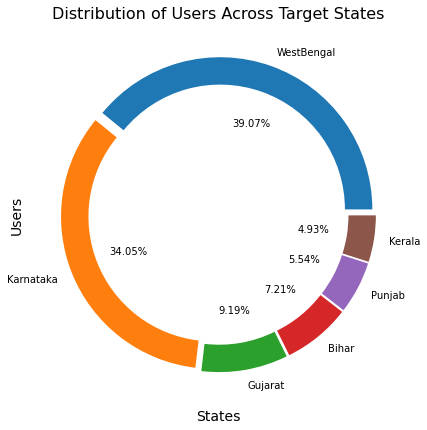

In [39]:
1.#Distribution of Users Across Target States
import numpy as np
#Distribution of Users(device_id) across States.
#labels = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
#Users = ['device_id']
figure= plt.figure(figsize=[15,7])
FiltStates['state'].value_counts().nlargest(10).plot.pie(autopct='%3.2f%%', explode=np.ones(6)/28, wedgeprops =dict(width=0.18), shadow = False, startangle = 0)
#plt.xticks(ticks =np.arange(0,90,5), size= 12)
#plt.yticks(ticks = np.arange(0,8000,8), size= 12)
plt.xlabel(xlabel='States',size=14)
plt.ylabel(ylabel= 'Users',size=14)
plt.title(label = 'Distribution of Users Across Target States', size= 16)
plt.grid(b=True)
plt.show()

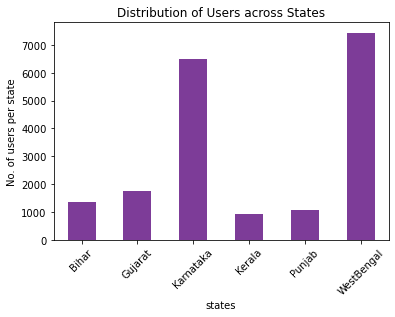

In [40]:
# 1. Distribution of Users(device_id) across States.
# TODO: Add the total frequencies on top of each bar in the plot.

# test2.groupby('state')['device_id'].count().plot(kind = 'bar') 
UsrStates = FiltStates.groupby('state')['device_id'].count()
UsrStates.plot(kind = 'bar',color = '#7D3C98')
plt.xticks(rotation = 45)
plt.xlabel('states')
plt.ylabel('No. of users per state')
plt.title("Distribution of Users across States")
plt.show()

In [41]:
#Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

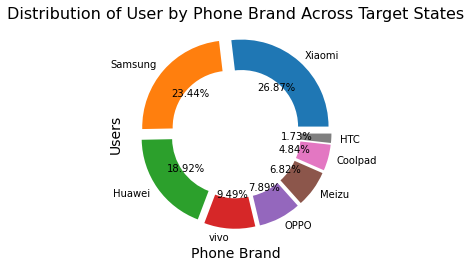

In [52]:
#2. Distribution of User by Phone Brand Across Target States
figure= plt.figure
#(figsize=[15,7])
FiltStates['phone_brand_i'].value_counts().nlargest(8).plot.pie(autopct='%3.2f%%', explode=np.ones(8)/10, wedgeprops =dict(width=0.35), shadow = False, startangle = 0)
#plt.xticks(ticks =np.arange(0,110,10), size= 12)
#plt.yticks(ticks = np.arange(0,110,10), size= 12)
plt.xlabel(xlabel='Phone Brand',size=14)
plt.ylabel(ylabel= 'Users',size=14)
plt.title(label = 'Distribution of User by Phone Brand Across Target States', size= 16)
plt.grid(b=True)
plt.show()

In [43]:
#Distribution of Users across Gender. Male/Female  Pie Chart

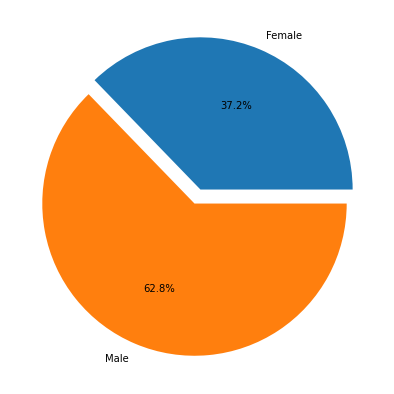

In [44]:
# 3. Distribution of Users across Gender.
# TODO: Modify the 

fig = plt.figure(figsize =(10, 7))
UsrGndr = FiltStates.groupby('gender_i')['device_id'].count()
UsrGndr

label = ['Female', 'Male']
label
exp = (0.05, 0.05)
plt.pie(x= UsrGndr, autopct="%.1f%%",explode = exp, labels=label)
plt.show()

In [45]:
3.#Distribution of Users across Age Segments. pd.cut functions to reconstruct new age segments. 


3.0

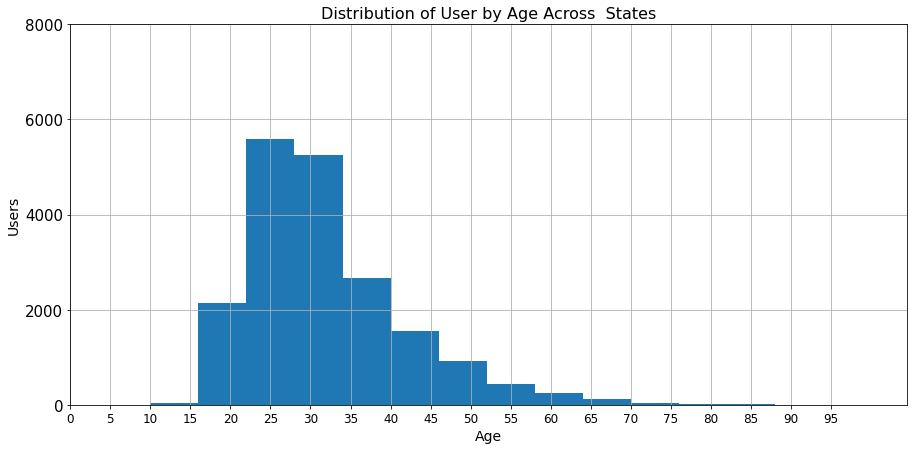

In [55]:
#Distribution of User by Age Across  States
figure= plt.figure(figsize=[15,7])
#bin number
b=15
bins = range(10,101,int(100/b))
FiltStates['age_i'].plot.hist(bins=bins)
plt.xticks(ticks =np.arange(0,100,5), size= 12)
plt.yticks(ticks = np.arange(0,10000,2000), size= 15)
plt.xlabel(xlabel='Age',size=14)
plt.ylabel(ylabel= 'Users',size=14)
plt.title(label = 'Distribution of User by Age Across  States', size= 16)
plt.grid(b=True)
plt.show()




In [47]:
#Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.

In [48]:
# 5. Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.
#fig = plt.figure(figsize =(15,7))
#chk = FiltStates[FiltStates['phone_brand_i'].value_counts().nlargest(10)]
sns.catplot(data=FiltStates(['phone_brand_i]),kind= 'count',x='new_group_i',hue= chk)
#plt.xticks(rotation=45)
#sns.catplot(data=FiltStates,kind= 'count',x='state',hue='phone_brand_i')
#plt.xticks(rotation=45)
#sns.catplot(data=FiltStates,kind= 'count',x='gender_i',hue='phone_brand_i')
plt.show()

SyntaxError: invalid syntax (<ipython-input-48-006ecff83efa>, line 3)

In [ ]:
#Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).

In [54]:
figure= plt.figure(figsize=[15,7])
#

FiltStates.groupby(by=['phone_brand_i'])['gender'].value_counts().plot.bar(color='blue')
FiltStates.groupby(by=['phone_brand_i'])['state'].value_counts().plot.bar(color='brown')
FiltStates.groupby(by=['phone_brand_i'])['age'].value_counts().plot.bar(color='orange')

KeyError: 'Column not found: gender'

<Figure size 1080x504 with 0 Axes>

In [ ]:
#Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).

In [ ]:
#Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

In [ ]:
#Hourly distribution of Phone Calls.

In [58]:
# 8. Hourly distribution of Phone Calls.
import datetime as dt

#list1 = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
#PhHrdist = PhHrdist[PhHrdist['state'].isin(list1)]

#Extracting Hour data from timestamp
FiltStates['Hour'] = FiltStates['timestamp'].dt.hour

#Extracting Month data from timestamp and mapping it to list monthmap
monthmap={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep",10:"Oct", 11:"Nov", 12:"Dec"}
FiltStates['Month'] = FiltStates['timestamp'].dt.month
# PhHrdist["Month"]=PhHrdist["Month"].map(monthmap)
FiltStates["Month"]=FiltStates["Month"].map(monthmap)

#Extracting Day of Week data from timestamp and mapping it to list weekmap
weekmap={0:"Mon", 1:"Tue", 2:"Wed", 3:"Thur", 4:"Fri", 5:"Sat", 6:"Sun"}
FiltStates["Day of Week"] = (FiltStates['timestamp'].dt.dayofweek) + 1
FiltStates["Day of Week"]=FiltStates["Day of Week"].map(weekmap)

FiltStates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, 1 to 60862
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   device_id      19032 non-null  float64       
 1   timestamp      19032 non-null  datetime64[ns]
 2   longitude      19032 non-null  float64       
 3   latitude       19032 non-null  float64       
 4   city           19032 non-null  object        
 5   state          19032 non-null  object        
 6   device_model   19032 non-null  object        
 7   gender_i       19032 non-null  object        
 8   age_i          19032 non-null  int64         
 9   new_group_i    19032 non-null  category      
 10  phone_brand_i  19032 non-null  object        
 11  Hour           19032 non-null  int64         
 12  Month          19032 non-null  object        
 13  Day of Week    16202 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(7)
mem

<AxesSubplot:>

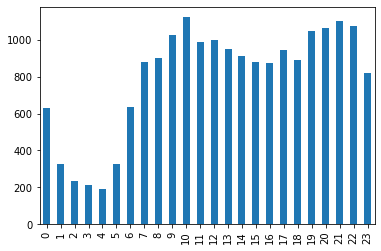

In [59]:
FiltStates["Hour"].value_counts().sort_index().plot.bar()

In [ ]:
#Plot the Users on the Map using any suitable package.